# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Fa'iz Abiyyu Rizqullah Saputra
- **Email:** faizsaputra79@gmail.com
- **ID Dicoding:** faiz abiyyu

## **Menentukan Pertanyaan Bisnis**

1. Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
2. Apakah ada perbedaan jumlah peminjaman sepeda pada hari kerja vs. akhir pekan atau hari libur?
3. Kapan waktu puncak penggunaan sepeda dalam sehari (berdasarkan data per jam)?
4. Bagaimana tren penggunaan sepeda dari tahun ke tahun?
5. Seberapa besar pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?

## **Import Semua Packages/Library yang Digunakan**

Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Ensure inline plotting
%matplotlib inline

pd.set_option('display.max_columns', None)

## **Data Wrangling**

### **Gathering Data**

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih **Bike Sharing Dataset**, maka saya mengimpor file **day.csv** dan **hr.csv**

### **Load tabel BIKE DAY**

In [ ]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Load tabel BIKE HOUR**

In [3]:
hr_df = pd.read_csv("./data/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### **Menilai day_df**

1. Mengecek tipe data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel day_df tidak ada missing values, berarti aman.

3. Mengecek apakah ada duplicate data

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Menilai hr_df**

1. Mengecek info hr_df

In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [9]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel hr_df tidak ada missing values, berarti aman.

3. Mengecek apakah ada duplicate data

In [ ]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [11]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Cleaning Data**

#### Cleaning day_df

1. Menghapus beberapa kolom yang tidak akan digunakan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.

In [12]:
drop_col = ['instant']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Mengubah beberapa detail tentang kolom

Karena nama-nama dari kolom diatas agak kurang sesuai dengan style saya, maka akan saya rubah. Dan juga saya lebih suka dengan tipe data yang bentuknya kategorikal, jadi beberapa yang sebelumnya adalah angka akan saya rubah. Serta sebelumnya ada tipe data yang juga tidak sesuai, dan itu akan saya rubah juga.

In [13]:
# Mengubah angka menjadi keterangan
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [14]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Cleaning hr_bike

1. Menghapus beberapa kolom yang tidak akan digunakan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.

In [ ]:
drop_col = ['instant']

for i in hr_df.columns:
  if i in drop_col:
    hr_df.drop(labels=i, axis=1, inplace=True)

hr_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Mengubah beberapa detail tentang kolom

Karena nama-nama dari kolom diatas agak kurang sesuai dengan style saya, maka akan saya rubah. Dan juga saya lebih suka dengan tipe data yang bentuknya kategorikal, jadi beberapa yang sebelumnya adalah angka akan saya rubah. Serta sebelumnya ada tipe data yang juga tidak sesuai, dan itu akan saya rubah juga.

In [18]:
# Mengubah angka menjadi keterangan
hr_df['mnth'] = hr_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hr_df['season'] = hr_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hr_df['weekday'] = hr_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hr_df['weathersit'] = hr_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [19]:
hr_df.head()


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Mengubah tipe data ke datetime
hr_df['dteday'] = pd.to_datetime(hr_df.dteday)

# Mengubaha tipe data ke categorical
hr_df['season'] = hr_df.season.astype('category')
hr_df['yr'] = hr_df.yr.astype('category')
hr_df['mnth'] = hr_df.mnth.astype('category')
hr_df['holiday'] = hr_df.holiday.astype('category')
hr_df['weekday'] = hr_df.weekday.astype('category')
hr_df['workingday'] = hr_df.workingday.astype('category')
hr_df['weathersit'] = hr_df.weathersit.astype('category')

hr_df.head()

## **Exploratory Data Analysis (EDA)**

### **Eksplorasi Data day_df**

1. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [26]:
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

2. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [27]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

3. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [28]:
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

4. Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)

In [29]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [30]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan hasil diatas, jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday. Namun dapat kita lihat juga, hasilnya lumayan berbeda walaupun tidak banyal.

6. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [ ]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

7. Kelompokkan temp, hum, dan humidity berdasarkan season

In [ ]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan sebagai berikut:
- Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.
- Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring.

8. Hubungan antara penyewa casual, registered, dan count

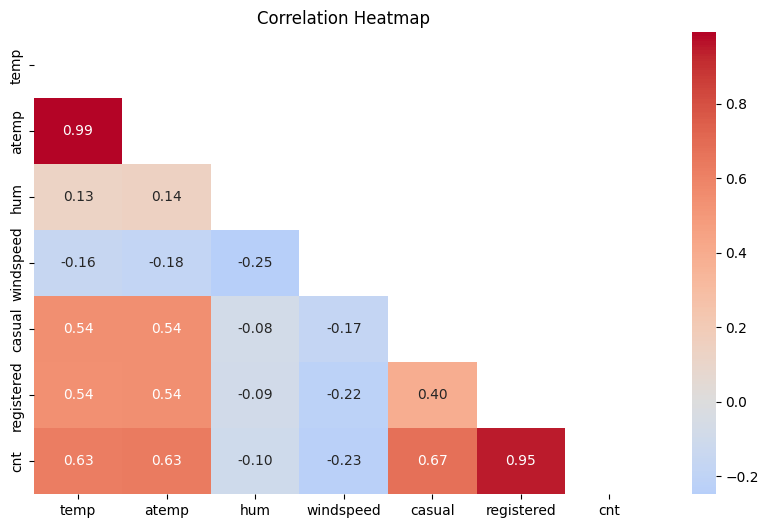

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:
- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).
- registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

### Merge ALL_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  object        
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [36]:
all_df = pd.merge(
    left=hr_df,
    right=day_df,
    how="left",
    on="dteday",
    suffixes=("_hour", "_day")
)

all_df.head()


,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985


### Exploratory All_df

In [37]:
all_df = pd.merge(
    left=hr_df,
    right=day_df,
    how="left",
    on="dteday",
    suffixes=("_hour", "_day")
)

all_df.head()


,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985


In [38]:
all_df.to_csv("all_data.csv", index=False)

## **Visualization & Explanatory Analysis**

### 1. Pola penggunaan sepeda berdasarkan musim dan kondisi cuaca

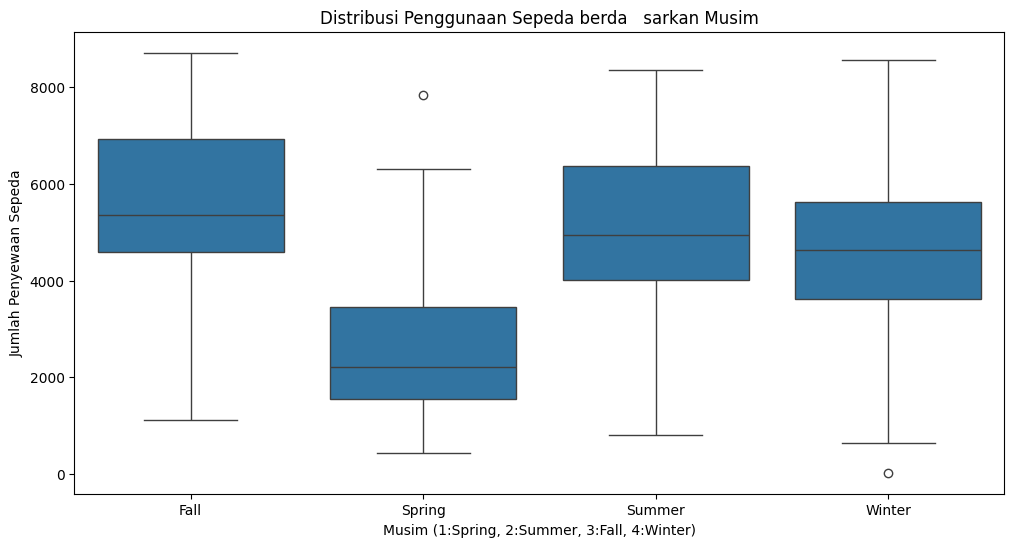

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Penggunaan Sepeda berda   sarkan Musim')
plt.xlabel('Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

#### Insight
**Pola Penggunaan Sepeda Berdasarkan Musim**
- Penggunaan sepeda bervariasi tergantung musim.
- Penggunaan tertinggi terjadi pada musim panas (**summer**) dan musim gugur (**fall**), dengan distribusi jumlah penyewaan yang lebih tinggi dibanding musim lainnya.
- Musim semi (**spring**) memiliki jumlah penyewaan yang lebih rendah dibandingkan musim panas dan gugur.
- Musim dingin (**winter**) menunjukkan penggunaan yang lebih rendah, kemungkinan disebabkan oleh cuaca yang kurang mendukung.

### 2. Perbedaan penggunaan sepeda pada hari kerja vs. akhir pekan/hari libur

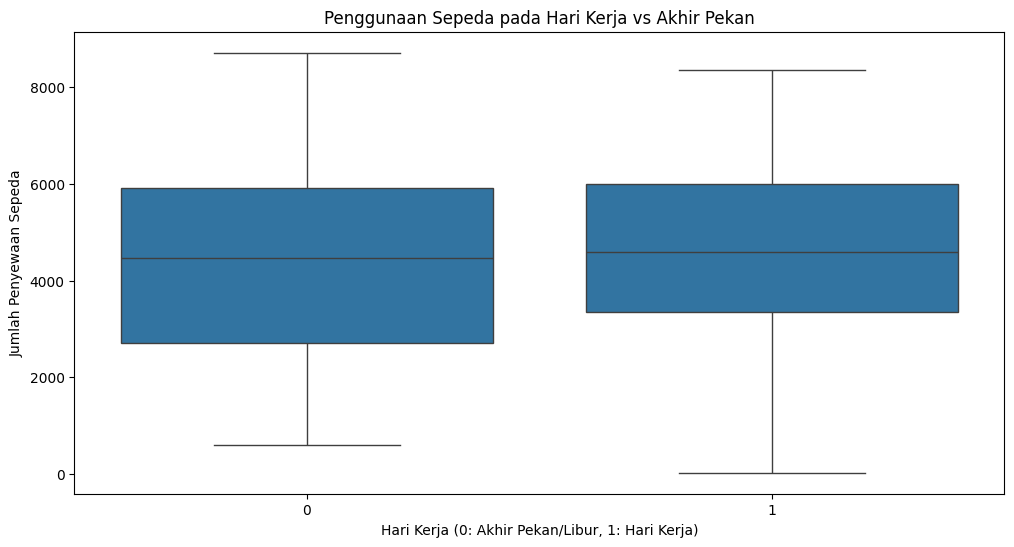

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (0: Akhir Pekan/Libur, 1: Hari Kerja)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

#### Insight 
**Perbedaan Penggunaan Sepeda pada Hari Kerja vs. Akhir Pekan/Hari Libur**
- Tidak ada perbedaan signifikan dalam distribusi penyewaan sepeda antara hari kerja dan akhir pekan/hari libur.
- Hal ini menunjukkan bahwa sepeda digunakan secara konsisten baik untuk keperluan bekerja maupun rekreasi.

### 3. Waktu puncak penggunaan sepeda dalam sehari

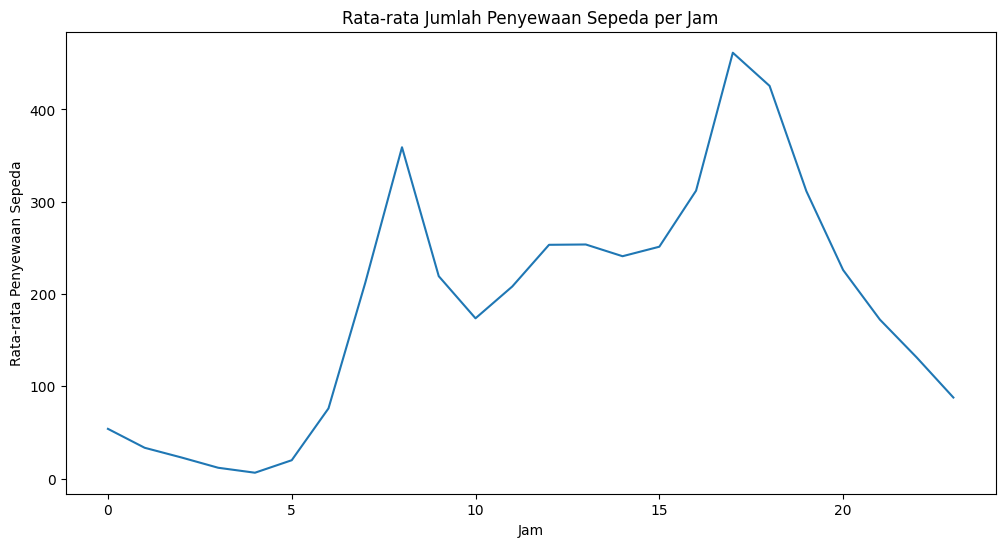

In [41]:
# Pastikan kolom numerik
hr_df['cnt'] = pd.to_numeric(hr_df['cnt'], errors='coerce')

# Grouping dengan mean hanya untuk kolom numerik
hr_df_mean = hr_df.groupby('hr').mean(numeric_only=True).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hr_df_mean)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

#### Insight
**Waktu Puncak Penggunaan Sepeda dalam Sehari**
- Puncak penggunaan sepeda terjadi pada dua waktu utama:
  1. **Pagi hari sekitar pukul 7-8** – Kemungkinan besar disebabkan oleh aktivitas berangkat kerja atau sekolah.
  2. **Sore hari sekitar pukul 17-18** – Berkaitan dengan waktu pulang kerja atau aktivitas rekreasi sore hari.
- Penggunaan sepeda cenderung rendah pada dini hari dan meningkat menjelang pagi.

### 4. Tren penggunaan sepeda dari tahun ke tahun


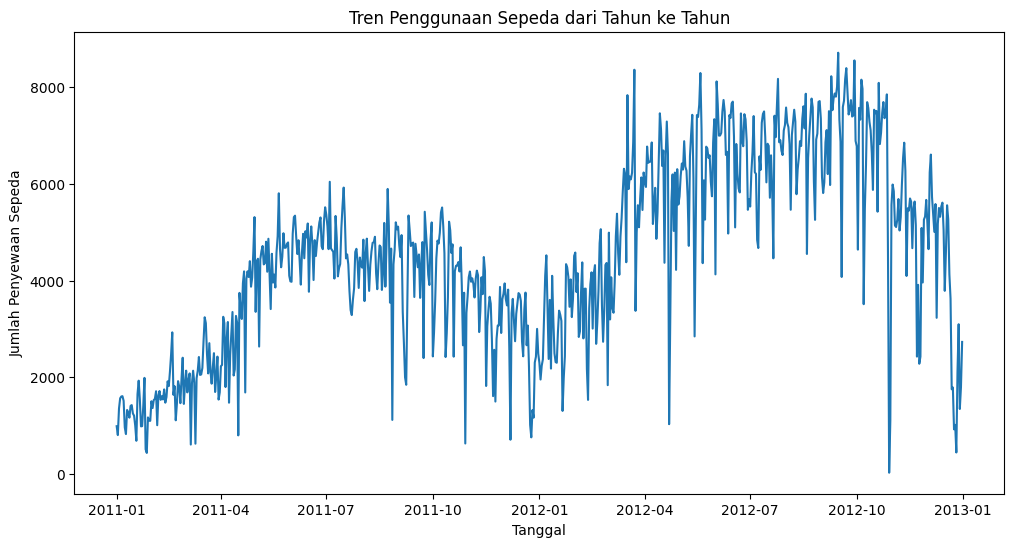

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day_df)
plt.title('Tren Penggunaan Sepeda dari Tahun ke Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

#### Insight
Tren Penggunaan Sepeda dari Tahun ke Tahun**
- Jumlah penyewaan sepeda mengalami tren meningkat dari awal hingga pertengahan tahun, kemudian mengalami penurunan pada akhir tahun.
- Terdapat pola musiman di mana jumlah penyewaan sepeda cenderung tinggi pada bulan-bulan tertentu, kemungkinan karena faktor cuaca atau liburan.
- Lonjakan signifikan terlihat di awal tahun 2012, yang menunjukkan peningkatan popularitas atau adanya faktor eksternal yang mendorong lebih banyak orang untuk menyewa sepeda.

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

### 5. Pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman

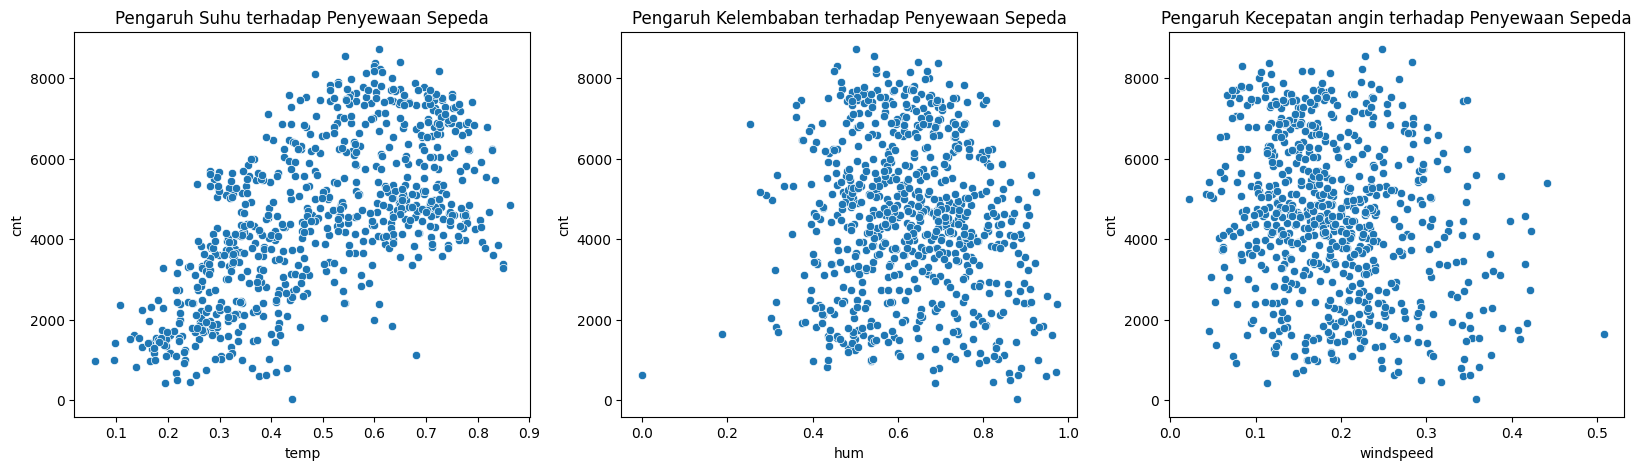

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(x='temp', y='cnt', data=day_df, ax=axes[0])
axes[0].set_title('Pengaruh Suhu terhadap Penyewaan Sepeda')
sns.scatterplot(x='hum', y='cnt', data=day_df, ax=axes[1])
axes[1].set_title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
sns.scatterplot(x='windspeed', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Pengaruh Kecepatan angin terhadap Penyewaan Sepeda')
plt.show()


#### Insight 
Pengaruh Suhu, Kelembaban, dan Kecepatan Angin terhadap Penyewaan Sepeda**
- **Suhu (temp):**
  - Terdapat korelasi positif antara suhu dengan jumlah penyewaan sepeda.
  - Semakin tinggi suhu, semakin banyak penyewaan sepeda yang terjadi.
  - Hal ini masuk akal karena cuaca yang lebih hangat lebih nyaman untuk bersepeda.
- **Kelembaban (hum):**
  - Tidak terdapat hubungan yang terlalu jelas antara kelembaban dan jumlah penyewaan sepeda.
  - Saat kelembaban terlalu tinggi, jumlah penyewaan cenderung lebih rendah.
  - Kemungkinan karena kondisi udara yang terlalu lembab tidak nyaman untuk bersepeda.
- **Kecepatan Angin (windspeed):**
  - Tampaknya kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.
  - Hal ini menunjukkan bahwa faktor angin bukanlah faktor utama yang dipertimbangkan oleh pengguna sepeda.


## RFM

In [47]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dteday           17379 non-null  datetime64[ns]
 1   season_hour      17379 non-null  object        
 2   yr_hour          17379 non-null  int64         
 3   mnth_hour        17379 non-null  object        
 4   hr               17379 non-null  int64         
 5   holiday_hour     17379 non-null  int64         
 6   weekday_hour     17379 non-null  object        
 7   workingday_hour  17379 non-null  int64         
 8   weathersit_hour  17379 non-null  object        
 9   temp_hour        17379 non-null  float64       
 10  atemp_hour       17379 non-null  float64       
 11  hum_hour         17379 non-null  float64       
 12  windspeed_hour   17379 non-null  float64       
 13  casual_hour      17379 non-null  int64         
 14  registered_hour  17379 non-null  int64

In [45]:
import pandas as pd  

# Konversi kolom tanggal ke format datetime  
all_df['dteday'] = pd.to_datetime(all_df['dteday'])  

# Menentukan tanggal terakhir dalam dataset  
max_date = all_df['dteday'].max()  

# Menghitung Recency, Frequency, dan Monetary berdasarkan tanggal unik  
rfm = all_df.groupby('dteday').agg(  
    Frequency=('dteday', 'count'),  # Jumlah hari kendaraan disewa  
    Monetary=('cnt_day', 'sum')  # Total jumlah penyewaan kendaraan per hari  
).reset_index()  

# Menghitung Recency secara terpisah  
rfm['Recency'] = (max_date - rfm['dteday']).dt.days  

# Menampilkan hasil  
print(rfm.head())


      dteday  Frequency  Monetary  Recency
0 2011-01-01         24     23640      730
1 2011-01-02         23     18423      729
2 2011-01-03         22     29678      728
3 2011-01-04         23     35926      727
4 2011-01-05         23     36800      726


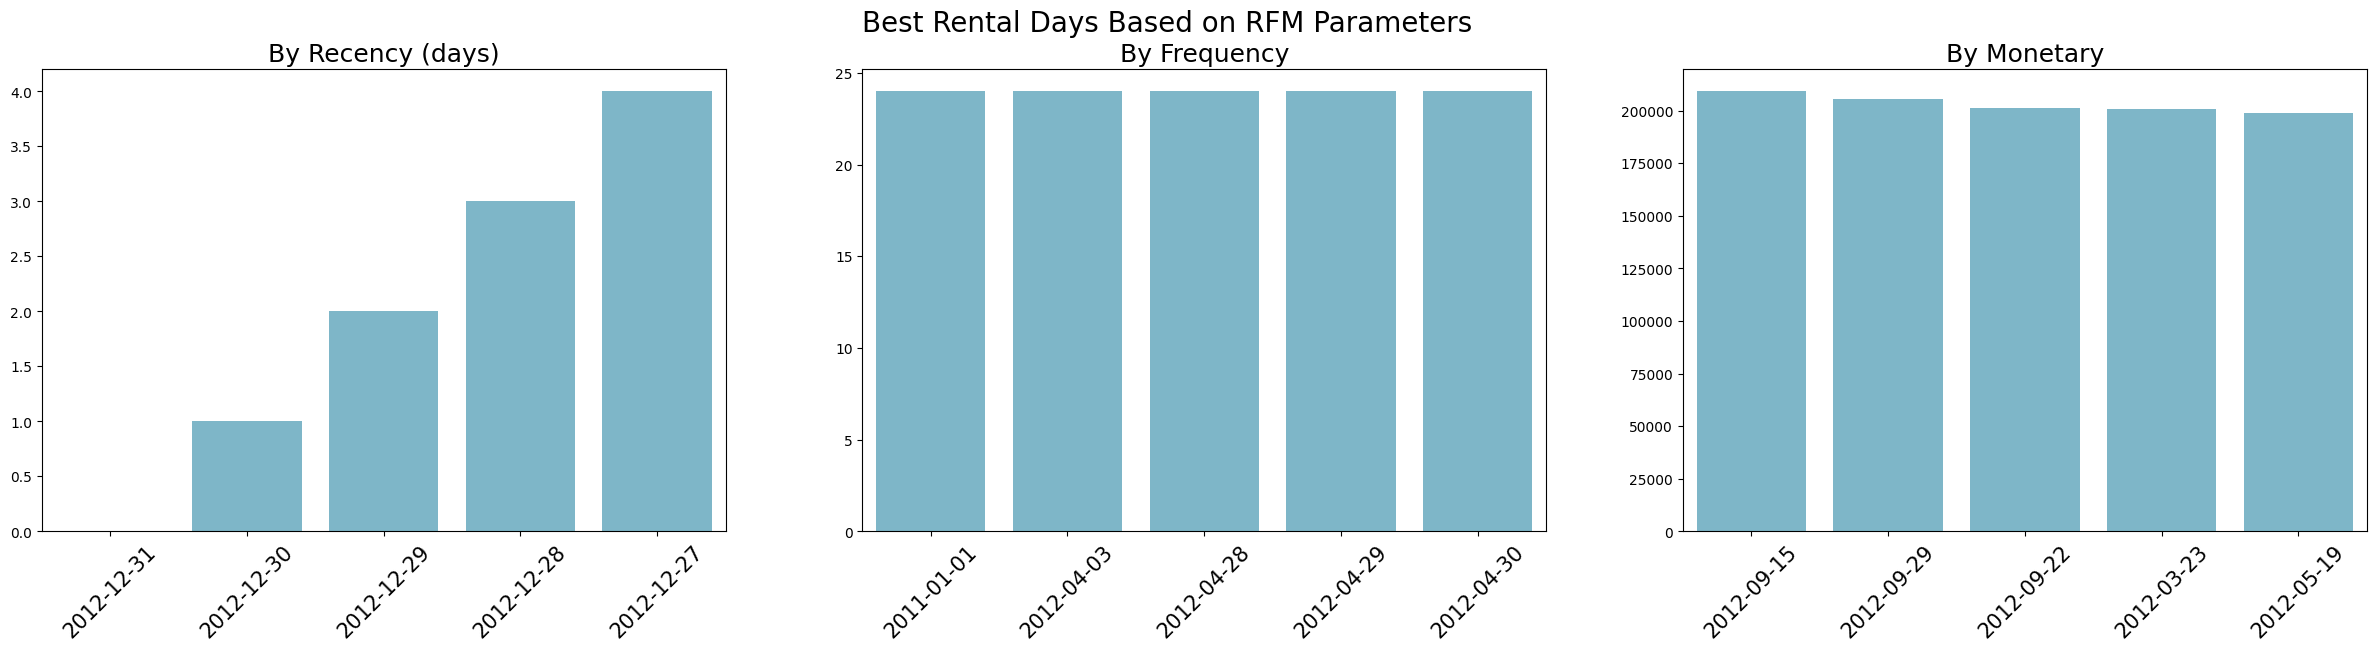

In [46]:
# Set ukuran figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk visualisasi
colors = ["#72BCD4"] * 5

# Visualisasi berdasarkan Recency (tanggal terbaru)
sns.barplot(y="Recency", x="dteday", 
            data=rfm.sort_values(by="Recency", ascending=True).head(5), 
            palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

# Visualisasi berdasarkan Frequency (hari dengan aktivitas tertinggi)
sns.barplot(y="Frequency", x="dteday", 
            data=rfm.sort_values(by="Frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# Visualisasi berdasarkan Monetary (jumlah penyewaan tertinggi)
sns.barplot(y="Monetary", x="dteday", 
            data=rfm.sort_values(by="Monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

# Judul utama
plt.suptitle("Best Rental Days Based on RFM Parameters", fontsize=20)
plt.show()


### Insight 
Analisis RFM (Recency, Frequency, Monetary)**
- **Recency (R):**
  - Tanggal-tanggal terakhir menunjukkan bahwa penyewaan sepeda masih aktif dalam beberapa hari terakhir dataset.
  - Menunjukkan permintaan yang tetap ada.
- **Frequency (F):**
  - Beberapa hari dalam dataset memiliki frekuensi penyewaan yang tinggi.
  - Kemungkinan disebabkan oleh event tertentu atau faktor musiman.
- **Monetary (M):**
  - Hari-hari tertentu memiliki jumlah penyewaan tertinggi.
  - Menunjukkan adanya puncak penggunaan sepeda pada tanggal-tanggal tersebut.


## **Conclusion**  
Berdasarkan analisis pola penggunaan sepeda, ditemukan bahwa musim, waktu dalam sehari, serta faktor cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Tren penggunaan sepeda cenderung meningkat pada musim panas dan gugur, dengan puncak penggunaan terjadi di pagi dan sore hari. Meskipun terdapat pengaruh suhu dan kelembaban, faktor angin tidak terlalu memengaruhi penyewaan sepeda. Analisis RFM juga menunjukkan bahwa permintaan sepeda tetap stabil dengan pola penyewaan yang bervariasi tergantung kondisi eksternal.  

---

### **Conclusion Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Musim**  
Pola penggunaan sepeda menunjukkan variasi yang bergantung pada musim. Penggunaan tertinggi terjadi pada musim panas dan gugur, sedangkan musim dingin memiliki tingkat penyewaan terendah. Cuaca yang lebih hangat dan nyaman menjadi faktor utama meningkatnya jumlah penyewaan sepeda di musim tertentu.  

---

### **Conclusion Pertanyaan 2: Perbedaan Penggunaan Sepeda pada Hari Kerja vs. Akhir Pekan/Hari Libur**  
Tidak terdapat perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan akhir pekan/hari libur. Hal ini mengindikasikan bahwa sepeda digunakan secara konsisten baik untuk keperluan komuter maupun rekreasi, menunjukkan bahwa layanan penyewaan sepeda memiliki permintaan yang stabil sepanjang minggu.  

---

### **Conclusion Pertanyaan 3: Waktu Puncak Penggunaan Sepeda dalam Sehari**  
Penggunaan sepeda mencapai puncaknya pada dua periode utama, yaitu pagi hari sekitar pukul 7-8 dan sore hari sekitar pukul 17-18. Hal ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke tempat kerja atau sekolah di pagi hari, serta perjalanan pulang atau aktivitas rekreasi di sore hari. Sementara itu, penggunaan sepeda cenderung rendah pada dini hari dan meningkat menjelang pagi.  

---

### **Conclusion Pertanyaan 4: Tren Penggunaan Sepeda dari Tahun ke Tahun**  
Tren penggunaan sepeda menunjukkan peningkatan dari awal hingga pertengahan tahun dan mengalami penurunan menjelang akhir tahun. Selain itu, terdapat lonjakan signifikan di awal tahun 2012, yang kemungkinan disebabkan oleh peningkatan popularitas layanan penyewaan sepeda atau faktor eksternal lainnya. Secara umum, pola musiman tetap menjadi faktor utama yang mempengaruhi tren tahunan.  

---

### **Conclusion Pertanyaan 5: Pengaruh Suhu, Kelembaban, dan Kecepatan Angin terhadap Penyewaan Sepeda**  
- **Suhu (temp):** Semakin tinggi suhu, semakin banyak penyewaan sepeda, karena cuaca yang lebih hangat lebih nyaman untuk bersepeda.  
- **Kelembaban (hum):** Tidak ada hubungan yang terlalu jelas, namun saat kelembaban terlalu tinggi, jumlah penyewaan cenderung menurun karena udara yang terlalu lembab bisa kurang nyaman untuk bersepeda.  
- **Kecepatan Angin (windspeed):** Kecepatan angin tidak memiliki pengaruh yang signifikan terhadap penyewaan sepeda, sehingga bukan faktor utama dalam keputusan pengguna untuk menyewa sepeda.  

---

### **Conclusion Pertanyaan 6: Analisis RFM (Recency, Frequency, Monetary)**  
- **Recency (R):** Aktivitas penyewaan sepeda masih berlangsung dalam beberapa hari terakhir, menunjukkan permintaan yang tetap stabil.  
- **Frequency (F):** Beberapa hari dalam dataset memiliki frekuensi penyewaan tinggi, yang kemungkinan dipengaruhi oleh event tertentu atau faktor musiman.  
- **Monetary (M):** Hari-hari tertentu menunjukkan jumlah penyewaan tertinggi, mencerminkan adanya puncak penggunaan sepeda pada tanggal-tanggal tersebut.  

Kesimpulan dari analisis RFM menunjukkan bahwa penyewaan sepeda tetap aktif dan memiliki pola penggunaan yang berulang, dengan periode tertentu menunjukkan lonjakan permintaan yang signifikan.
